# Gradient Descent Example

In [1]:
import torch
import matplotlib.pyplot as plt

import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

/home/azhasc/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
# Example of rollercoaster going uphill, reaching top, and going downhill

time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

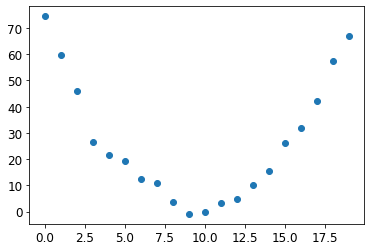

In [3]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 +1   #some quadratic function to define speed
plt.scatter(time,speed)

In [4]:
#Define a function that estimates at any time what the speed of rollercoaster is

def f(t,params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

### The predictions come from the function defined above, and the actual values(targets) come from the plot

In [5]:
#Define a loss function, to return value pased on prediction and target

def mse(preds, targets): return ((preds-targets)**2).mean()

In [6]:
#Step 1

params = torch.randn(3).requires_grad_()

In [7]:
orig_params = params.clone()

In [8]:
#Step 2

preds = f(time,params)

In [9]:
def show_preds(preds,ax = None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds), color = 'red')
    ax.set_ylim(-300,100)

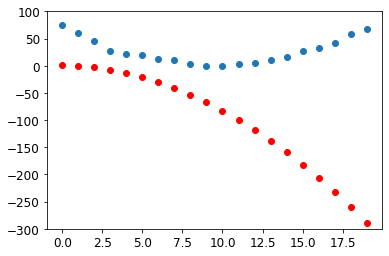

In [10]:
show_preds(preds)   #red = predictions and blue = target

In [11]:
#Step 3

loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [12]:
#Step 4 

loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [13]:
params.grad * 1e-5   #learning rate

tensor([-0.5320, -0.0342, -0.0025])

In [14]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [15]:
#Step 5

lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [16]:
preds = f(time,params)
mse(preds,speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

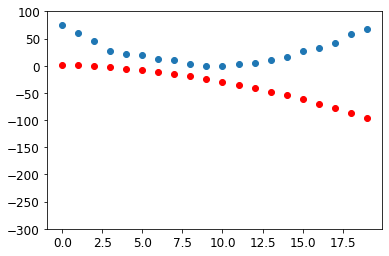

In [17]:
show_preds(preds)

In [18]:
#Put everything together to create a function

def apply_step(params, prn = True):
    preds = f(time,params)
    loss = mse(preds,speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds
    

In [19]:
#Step 6

for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [20]:
# params = orig_params.detach().requires_grad()    #???

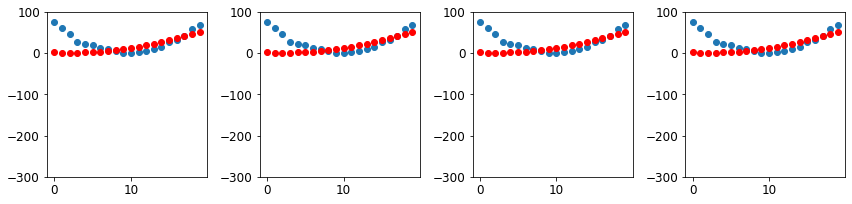

In [21]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [22]:
#Step 7 is stop. We have stopped in 10 epochs